## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

# Tensorflow libraries
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#matplotlib style
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['legend.frameon'] = False


## Resnet full model evaluate

In [2]:
# Resnet predictions with last layer
#resnet_model = tf.keras.applications.ResNet50V2(include_top=True, weights='imagenet')
#resnet_model.save('../data/pretrained_models/resnet50_toplayer.h5')

In [3]:
resnet_model = tf.keras.models.load_model('../data/pretrained_models/resnet50_toplayer.h5')

2022-07-21 11:13:33.912364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 11:13:33.916159: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 11:13:33.916280: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 11:13:33.916570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

1/1 [==============================] - 0s 20ms/step
Predicted: [('n11939491', 'daisy', 0.99999905), ('n02206856', 'bee', 3.0122266e-07), ('n02190166', 'fly', 2.2398463e-07), ('n01795545', 'black_grouse', 3.679353e-08), ('n01737021', 'water_snake', 1.8188254e-08), ('n03937543', 'pill_bottle', 1.7844187e-08)]


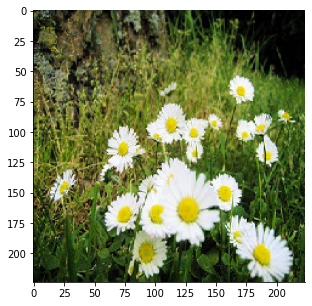

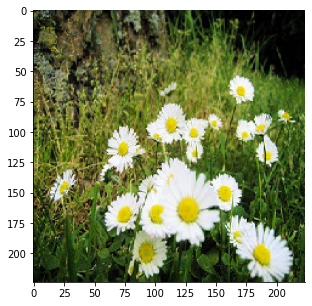

In [14]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

img_path = '/home/titou/Documents/git/flower_image_class/data/flower_photos/daisy/144099102_bf63a41e4f_n.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)

def process_img(img):
    process = tf.keras.Sequential([
        tf.keras.layers.Resizing(224, 224),
        tf.keras.layers.Rescaling(1./255)
    ])
    processed_img = process(img)
    return processed_img

x = process_img(x)

preds = resnet_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=6)[0])
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()